In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [46]:
df = pd.read_csv("../data/tiempos_clean.csv")

In [11]:
df.sample(5)

,zona,atraccion,tiempo_espera,abierta,ultima_actualizacion,fecha,hora,dia_semana,timestamp,mes,fin_de_semana,temperatura,humedad,sensacion_termica,codigo_clima,festivo
226,Old West Territory,Coaster Express,5,True,2025-10-16 13:25:08+00:00,2025-10-16,13:25,Jueves,2025-10-16 13:25:08,10,False,22.5,50,22.4,3,False
391,DC Super Heroes World,La Venganza del Enigma,10,True,2025-10-17 12:25:10+00:00,2025-10-17,12:25,Viernes,2025-10-17 12:25:10,10,False,21.1,50,20.8,1,False
441,DC Super Heroes World,The Joker Coches de Choque,5,True,2025-10-17 13:10:09+00:00,2025-10-17,13:10,Viernes,2025-10-17 13:10:09,10,False,22.6,44,22.2,1,False
596,DC Super Heroes World,The Joker Coches de Choque,5,True,2025-10-17 16:35:11+00:00,2025-10-17,16:35,Viernes,2025-10-17 16:35:11,10,False,24.2,38,23.5,0,False
807,Movie World Studios,Cine Tour,5,True,2025-10-22 12:05:14+00:00,2025-10-22,12:05,Miércoles,2025-10-22 12:05:14,10,False,20.2,61,18.3,1,False


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tiempo_espera,949.0,8.050580,9.395976,5.0,5.0,5.0,5.0,90.0
mes,949.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
temperatura,949.0,21.322023,2.209943,17.2,19.1,21.1,23.7,24.2
humedad,949.0,52.866175,10.793028,38.0,44.0,51.0,61.0,75.0
sensacion_termica,949.0,20.549104,2.464151,16.5,18.3,20.8,23.0,23.6
codigo_clima,949.0,1.602740,1.037906,0.0,1.0,2.0,3.0,3.0


In [47]:
# Conteo de valores nulos
df.isna().sum().sort_values(ascending=False)


zona                    0
atraccion               0
tiempo_espera           0
abierta                 0
ultima_actualizacion    0
fecha                   0
hora                    0
dia_semana              0
timestamp               0
mes                     0
fin_de_semana           0
temperatura             0
humedad                 0
sensacion_termica       0
codigo_clima            0
festivo                 0
dtype: int64

In [16]:
# Separar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("📊 Columnas numéricas:", num_cols)
print("🏷️ Columnas categóricas:", cat_cols)


📊 Columnas numéricas: ['tiempo_espera', 'mes', 'temperatura', 'humedad', 'sensacion_termica', 'codigo_clima']
🏷️ Columnas categóricas: ['zona', 'atraccion', 'abierta', 'ultima_actualizacion', 'fecha', 'hora', 'dia_semana', 'timestamp', 'fin_de_semana', 'festivo']


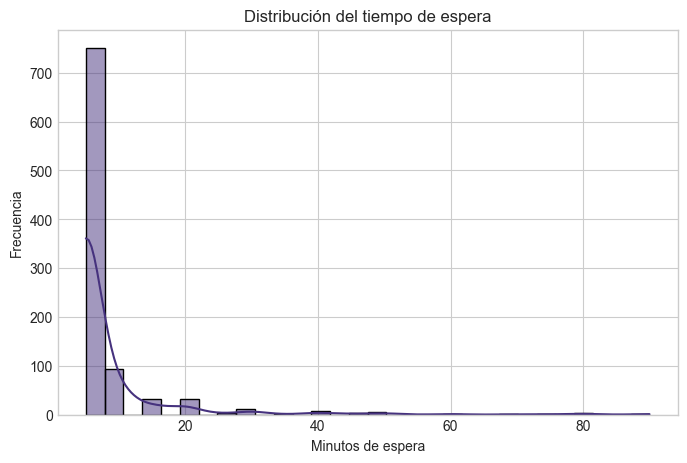

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['tiempo_espera'], bins=30, kde=True)
plt.title("Distribución del tiempo de espera")
plt.xlabel("Minutos de espera")
plt.ylabel("Frecuencia")
plt.show()


In [20]:
df["tiempo_espera"].value_counts(ascending=False)

tiempo_espera
5     751
10     94
15     32
20     31
30     12
40      7
50      5
25      4
45      3
80      3
60      2
90      2
35      1
75      1
70      1
Name: count, dtype: int64

In [23]:
df.groupby('atraccion')['tiempo_espera'].mean().sort_values(ascending=False).head(10)


atraccion
Batman Gotham City Escape          13.500000
La Aventura de Scooby-Doo          12.169811
Superman La Atracción de Acero     11.458333
Correcaminos Bip Bip               10.648148
Coaster Express                     9.905660
La Venganza del Enigma              9.056604
Shadows of Arkham                   8.750000
Tom & Jerry Picnic en el Parque     7.708333
La Captura de Gossamer              7.129630
The Joker Coches de Choque          7.037037
Name: tiempo_espera, dtype: float64

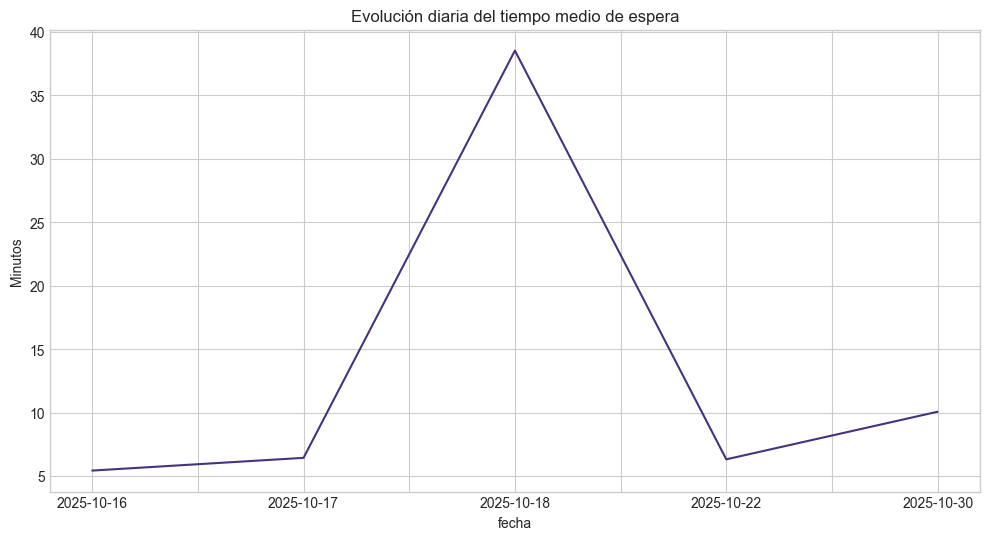

In [48]:


df.groupby('fecha')['tiempo_espera'].mean().plot(figsize=(12,6))
plt.title("Evolución diaria del tiempo medio de espera")
plt.ylabel("Minutos")
plt.show()

In [29]:
df.groupby(["atraccion", "fecha"])["tiempo_espera"].mean().sort_values(ascending=False)

atraccion                            fecha     
La Aventura de Scooby-Doo            2025-10-18    80.000000
Batman Gotham City Escape            2025-10-18    73.333333
Correcaminos Bip Bip                 2025-10-18    61.666667
Coaster Express                      2025-10-18    51.666667
Shadows of Arkham                    2025-10-18    50.000000
                                                     ...    
Pato Lucas Coches Locos              2025-10-16     5.000000
Piolín y Silvestre Paseo en Autobús  2025-10-16     5.000000
Tom & Jerry Picnic en el Parque      2025-10-17     5.000000
                                     2025-10-22     5.000000
Wile E. Coyote Zona de Explosión     2025-10-16     5.000000
Name: tiempo_espera, Length: 97, dtype: float64

In [30]:
df.groupby(['zona', 'atraccion'])['tiempo_espera'].mean()


zona                   atraccion                            
Cartoon Village        A Toda Máquina                            5.875000
                       Cartoon Carousel                          5.185185
                       Convoy de Camiones                        5.000000
                       Correcaminos Bip Bip                     10.648148
                       Emergencias Pato Lucas                    5.000000
                       He Visto un Lindo Gatito                  5.000000
                       La Aventura de Scooby-Doo                12.169811
                       La Captura de Gossamer                    7.129630
                       Looney Tunes Correo Aéreo                 6.388889
                       Marvin el Marciano Cohetes Espaciales     5.000000
                       Pato Lucas Coches Locos                   5.000000
                       Piolín y Silvestre Paseo en Autobús       5.000000
                       Scooby-Doo's Tea Party Miste

<Axes: title={'center': 'Media de espera por hora'}, xlabel='hora'>

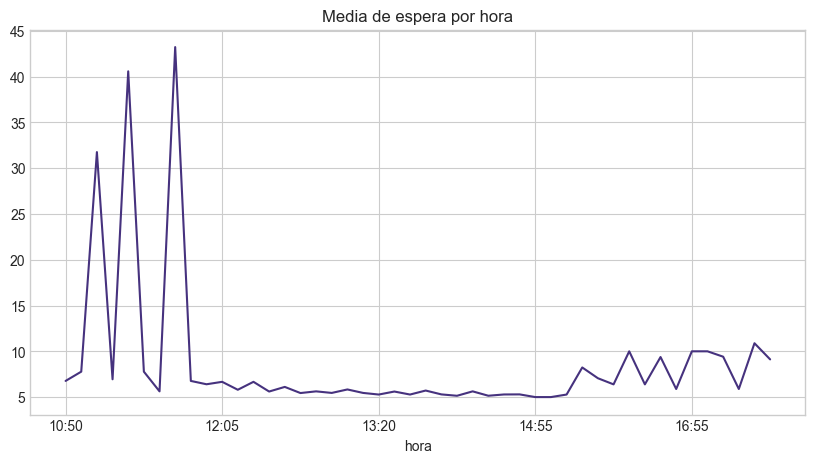

In [49]:
df.groupby("hora")["tiempo_espera"].mean().plot(kind="line", figsize=(10,5), title="Media de espera por hora")


In [50]:
df.groupby('dia_semana')['tiempo_espera'].mean().sort_values()

dia_semana
Jueves        6.227154
Miércoles     6.326531
Viernes       6.444444
Sábado       38.529412
Name: tiempo_espera, dtype: float64

In [52]:
df.groupby("atraccion")["tiempo_espera"].mean().sort_values(ascending=False)

atraccion
Batman Gotham City Escape                13.500000
La Aventura de Scooby-Doo                12.169811
Superman La Atracción de Acero           11.458333
Correcaminos Bip Bip                     10.648148
Coaster Express                           9.905660
La Venganza del Enigma                    9.056604
Shadows of Arkham                         8.750000
Tom & Jerry Picnic en el Parque           7.708333
La Captura de Gossamer                    7.129630
The Joker Coches de Choque                7.037037
Stunt Fall                                6.875000
Hotel Embrujado                           6.500000
Cine Tour                                 6.442308
Looney Tunes Correo Aéreo                 6.388889
A Toda Máquina                            5.875000
Los Carros de la Mina                     5.833333
Mr. Freeze Fábrica de Hielo               5.833333
Cartoon Carousel                          5.185185
He Visto un Lindo Gatito                  5.000000
Emergencias Pato Luca

In [56]:
df.groupby(["fecha", 'codigo_clima'])['tiempo_espera'].mean().sort_values()

fecha       codigo_clima
2025-10-16  3                5.394191
            2                5.584416
2025-10-17  1                5.848485
2025-10-22  1                5.851064
            2                6.971154
2025-10-17  0                7.380952
2025-10-30  2               10.076923
2025-10-18  0               38.529412
Name: tiempo_espera, dtype: float64